In [1]:
using Plots
using Statistics
using StatsPlots

### Defining approximating function where n = number of simulations and showplot determines whether the function returns the pi approximation result or prints a plot

In [2]:
#Defining approximating function where n = number of simulations and showplot determines whether 
#the function returns the pi approximation result or prints a plot
function approx_pi(n::Int; showplot = false::Bool)
    in_circle = []
    out_circle = []
    for _ in 1:n
        x = rand()
        y = rand()
        if x^2+y^2<=1
            push!(in_circle, (x,y))
        else
            push!(out_circle, (x,y))
        end
    end
    
    if !showplot return length(in_circle)/n*4  
    
    else
        plot([p[1] for p in in_circle], [p[2] for p in in_circle], 
             seriestype =:scatter, ms = 5, xlims = (0,1), ylims = (0,1), aspect_ratio=:equal, size = (380,380))
        plot!([p[1] for p in out_circle], [p[2] for p in out_circle],  
            seriestype =:scatter, ms = 5, xlims = (0,1), ylims = (0,1))
        plot!([x for x in 0:0.01:1], [sqrt(1-x^2) for x in 0:0.01:1], lw=1.5, label="Circle boundary")
        xlabel!("x")
        ylabel!("y")
    end
end

approx_pi (generic function with 1 method)

### Results

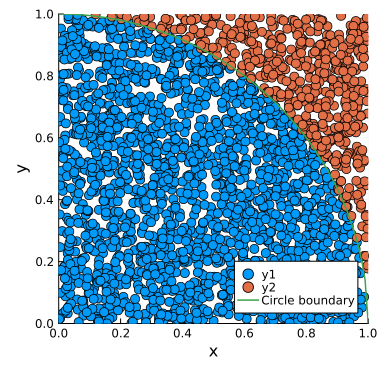

In [3]:
#show plot
approx_pi(2500, showplot = true)

In [4]:
#pi approximation
pi = approx_pi(100000)
print("π approximation in this iteration equaled to $pi")

π approximation in this iteration equaled to 3.14548

### Definition of a function executing function k times, 10^k each iteration

In [5]:
function approx_steps(k = 5::Int)
    count = 1:k
    approx_result = Float64[]
    for i in count
        push!(approx_result, approx_pi(10^i, showplot = false))
    end
    return approx_result
end

approx_steps (generic function with 2 methods)

### Defining a function running the above function n-times with k given as the second argument

In [6]:
function run_n_times_approx_steps(num_runs = 1000::Int, k = 5::Int)
    result = Matrix{Float64}(undef, num_runs, k)
    for run in 1:num_runs
        result[run, :] = approx_steps(k)
    end
    return result
end

run_n_times_approx_steps (generic function with 3 methods)

## !!!Run function and store results!!! by default - 1000 runs, max k = 5

In [14]:
result_matrix = run_n_times_approx_steps()
result_matrix_width = size(result_matrix)[2]

5

### Plotting

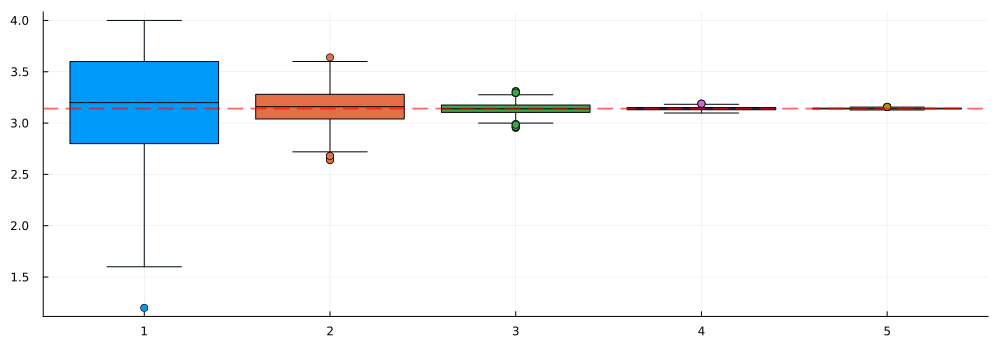

In [8]:
plot(boxplot(result_matrix, legend=false, size=(1000, 340)))
hline!([π], line=:dash, color=:red, label="π", lw = 1.8, alpha = 0.6)

### Means and quantiles

##### means and their deviation from pi

In [15]:
for k in 1:result_matrix_width
    quantile_05 = quantile(result_matrix[:,k], 0.05)
    quantile_95 = quantile(result_matrix[:,k], 0.95)
    println("For k = $k:")
    println("- 0.05 quantile: $(round(quantile_05, digits=4))")
    println("- 0.95 quantile: $(round(quantile_95, digits=4))")
    mean_approx = mean(result_matrix[:,k])
    deviation_from_pi = π - mean_approx
    println("- mean π approximation: $(round(mean_approx, digits=4))")
    println("- deviation from actual π: $(round(deviation_from_pi, digits=4))\n")
end

For k = 1:
- 0.05 quantile: 2.4
- 0.95 quantile: 4.0
- mean π approximation: 3.1312
- deviation from actual π: 0.0104

For k = 2:
- 0.05 quantile: 2.88
- 0.95 quantile: 3.4
- mean π approximation: 3.1488
- deviation from actual π: -0.0072

For k = 3:
- 0.05 quantile: 3.056
- 0.95 quantile: 3.228
- mean π approximation: 3.1425
- deviation from actual π: -0.0009

For k = 4:
- 0.05 quantile: 3.1144
- 0.95 quantile: 3.1684
- mean π approximation: 3.1414
- deviation from actual π: 0.0002

For k = 5:
- 0.05 quantile: 3.1329
- 0.95 quantile: 3.1503
- mean π approximation: 3.1415
- deviation from actual π: 0.0001



#### Defining a function saving quantiles and mean per each k value for plots

In [16]:
function save_parameters()
    parameter_matrix = Matrix{Float64}(undef, size(result_matrix)[2], 3)
    for k in 1:result_matrix_width
        parameter_vector = []
        quantile_05 = quantile(result_matrix[:,k], 0.05) #1st col
        quantile_95 = quantile(result_matrix[:,k], 0.95) #2nd col
        mean_approx = mean(result_matrix[k,:]) #3rd col
        push!(parameter_vector, quantile_05)
        push!(parameter_vector, quantile_95)
        push!(parameter_vector, mean_approx)
        parameter_matrix[k,:] = parameter_vector
    end
    return parameter_matrix
end

save_parameters (generic function with 1 method)

#### Saving parameters using the defined function

In [17]:
parameter_matrix = save_parameters()

5×3 Matrix{Float64}:
 2.4      4.0      3.09454
 2.88     3.4      3.1227
 3.056    3.228    2.9785
 3.1144   3.1684   3.10555
 3.13291  3.15032  3.09451

#### Plotting mean and quantiles _05, _95

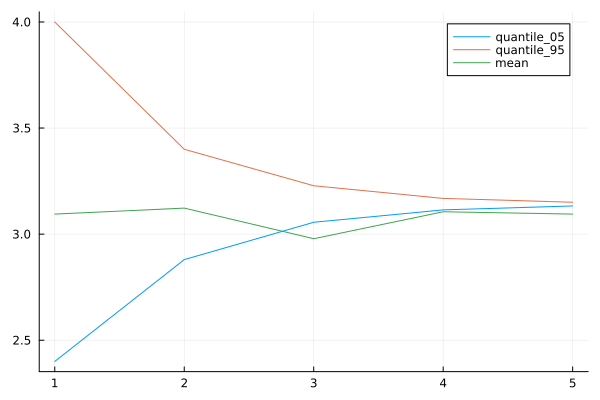

In [18]:
plot([p for p in 1:result_matrix_width], [p for p in parameter_matrix[:,1]], label=:"quantile_05")
plot!([p for p in 1:result_matrix_width], [p for p in parameter_matrix[:,2]], label =:"quantile_95")
plot!([p for p in 1:result_matrix_width], [p for p in parameter_matrix[:,3]], label =:"mean")